Time to get your hands dirty! Supernova distances and redshifts (part 1)

In [38]:
import numpy as np
import pylab as plt
from astroML.datasets import generate_mu_z

In [39]:
z_sample, mu_sample, dmu = generate_mu_z(100, random_state=1234)

(35.0, 50.0)

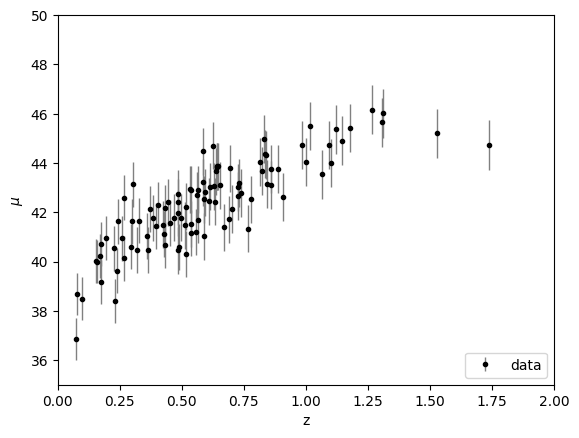

In [40]:
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.legend(loc='lower right')
plt.xlim(0,2)
plt.ylim(35,50)

provo linear regression (un po' a caso in realtà)

39.56505554722625 [4.64711848]


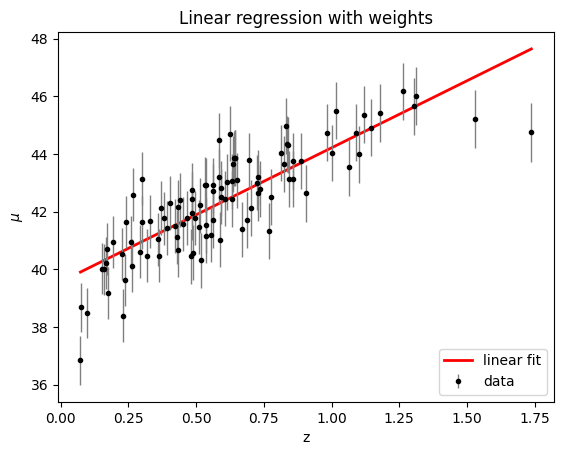

In [41]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(z_sample[:, np.newaxis], mu_sample) #rivedo qua che sto facendo a casissimo 

theta0 = lin_reg.intercept_
theta1 = lin_reg.coef_

print(theta0, theta1)

idx = np.argsort(z_sample) #ricordo di ordinare i dati 

y_pred = lin_reg.predict(z_sample[:, np.newaxis])

plt.plot(z_sample[idx], y_pred[idx], color='red', lw=2, label='linear fit') #anche qua ho fatto a caso 
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$")

plt.legend(loc='lower right')
plt.title("Linear regression with weights")
plt.show()

proviamo la polynomial regression 

Text(0.5, 1.0, 'Polynomial regression with weights')

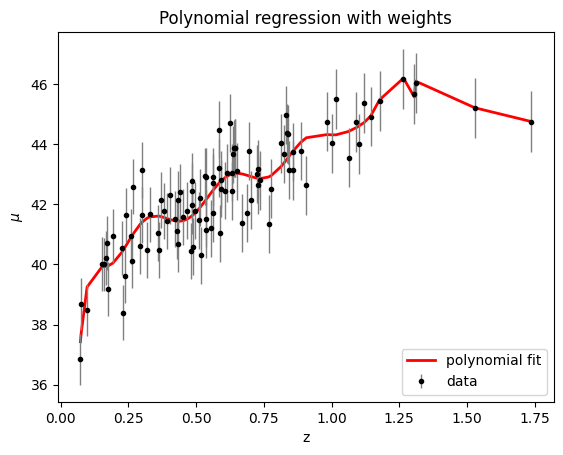

In [43]:
from astroML.linear_model import PolynomialRegression
degree = 30
model = PolynomialRegression(degree) # fit 3rd degree polynomial
model.fit(z_sample[:, np.newaxis], mu_sample) #rivedo qua che sto facendo a casissimo 

y_pred = model.predict(z_sample[:, np.newaxis])
idx = np.argsort(z_sample) #ricordo di ordinare i dati 

plt.plot(z_sample[idx], y_pred[idx], color='red', lw=2, label='polynomial fit') #fsatto a caso
plt.errorbar(z_sample, mu_sample, dmu, fmt='.k', ecolor='gray', lw=1,label='data')
plt.xlabel("z")
plt.ylabel(r"$\mu$")
plt.legend(loc='lower right')
plt.title("Polynomial regression with weights")


vedo di capire numericamente quale è meglio, quale underfitta e quale overfitta, ora non mi ricordo come si fa 


implemento cross validation, learning curves, poi faccio con basis funcion regression, kernel regresison e faccio il resto scritto nelle task 